In [14]:
import os #Set Working Directory
print(os.getcwd()) 
os.chdir("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook")
print(os.getcwd()) 

C:\Users\aldwi\0ADC_THESIS
C:\Users\aldwi\OneDrive\Desktop\thesis\notebook


# Feature Engineering

## Missing Value Imputation

Commonly, the mean and median strategies are applied for imputing missing values, but these approaches are prone to bias (Zhang, 2016).

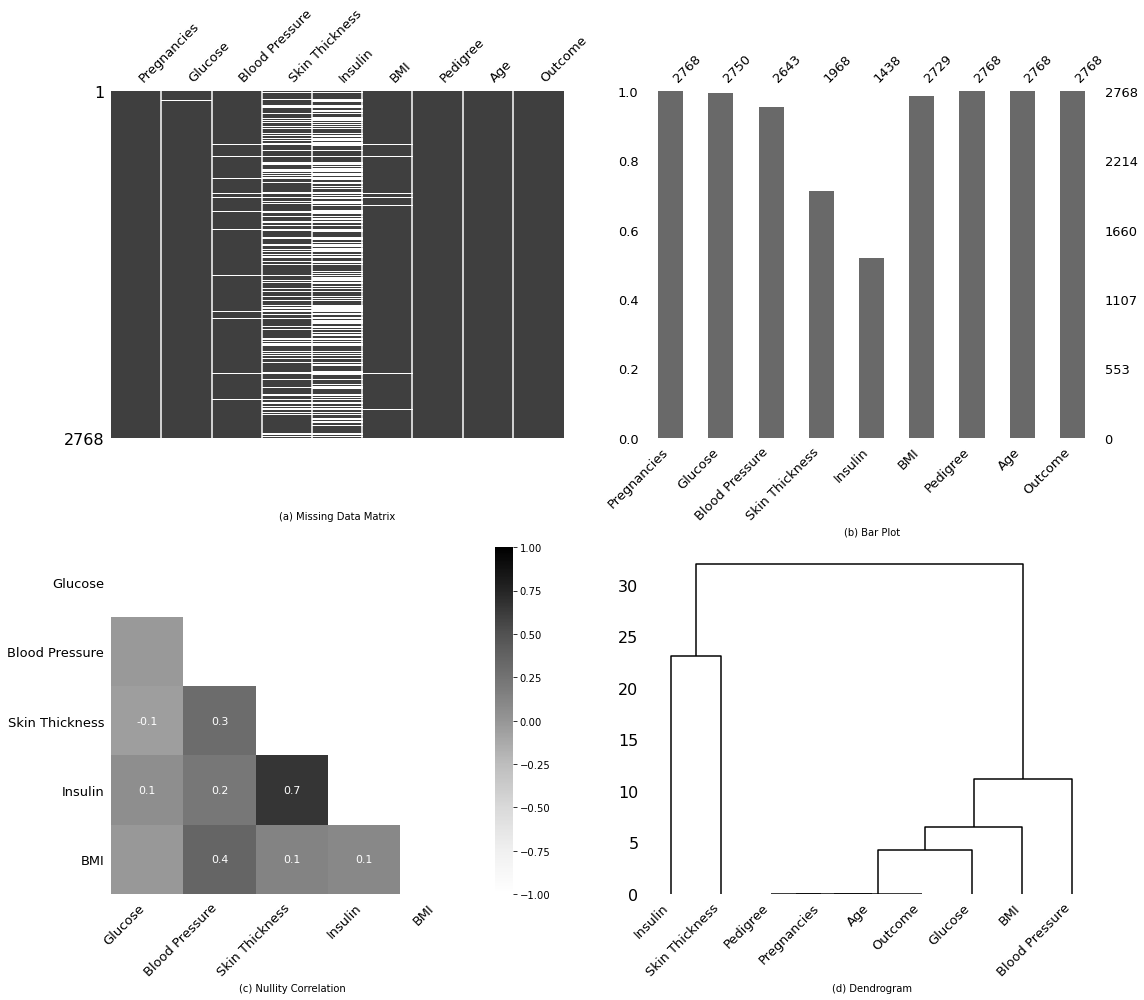

In [3]:
import pandas as pd
def missingno(data):
    import missingno as msno
    import matplotlib.pyplot as plt
    
    fig,axes=plt.subplots(2,2,figsize=(16,14))
       
    g = msno.matrix(data,sparkline=False,labels=None,fontsize=13,ax=axes[0][0])
    g.set(xlabel="\n\n\n\n\n\n(a) Missing Data Matrix")
    
    g = msno.bar(data,fontsize=13,labels=None,ax=axes[0][1])
    g.set(xlabel="(b) Bar Plot")
    
    g = msno.heatmap(data,cmap='Greys',fontsize=13,ax=axes[1][0])
    g.set(xlabel="(c) Nullity Correlation")
    
    g = msno.dendrogram(data,fontsize=13,orientation="top",ax=axes[1][1])
    g.set(xlabel="(d) Dendrogram")
    
    plt.tight_layout()
    #plt.savefig("MISSINGNO_matrix_bar_correlation_dendrogram.png")

data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
missingno(data)

In [ ]:
def impute(data):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.linear_model import BayesianRidge
    from sklearn.impute import IterativeImputer
    import pandas as pd

    brr = IterativeImputer(estimator=BayesianRidge(),random_state=0) #Bayesian Ridge Regression
    rfr = IterativeImputer(estimator=RandomForestRegressor(),random_state=0) #Random Forest Regressor
    etr = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=0) #Extra Trees Regressor
    knr = IterativeImputer(estimator=KNeighborsRegressor(),random_state=0) #K-Neighbors Regressor
    dtr = IterativeImputer(estimator=DecisionTreeRegressor(),random_state=0) #Decision Tree Regressor

    imputation = [brr,rfr,etr,knr,dtr]
    name = ["Bayesian Ridge Regression","Random Forest Regressor","Extra Trees Regressor", "K-Neighbors Regressor","Decision Tree Regressor"]

    i=0 #Impute and Export
    for technique in imputation:
        technique = technique.fit_transform(data)
        technique = pd.DataFrame(technique)
        technique.to_csv(name[i]+".csv",index=False,columns = data.columns)
        i =i+1
    
    print("NOTE: Column names are changed!")

impute(data)

In [21]:
brr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")
rfr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1RFR.csv")
etr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1ETR.csv")
knr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1KNR.csv")
dtr = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1DTR.csv")

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

imputation = [brr,rfr,etr,knr,dtr]

X_brr = brr.drop(["Outcome"],axis=1)
y_brr = brr["Outcome"]

X_rfr = rfr.drop(["Outcome"],axis=1)
y_rfr = rfr["Outcome"]

X_etr = etr.drop(["Outcome"],axis=1)
y_etr = etr["Outcome"]

X_knr = knr.drop(["Outcome"],axis=1)
y_knr = knr["Outcome"]

X_dtr = dtr.drop(["Outcome"],axis=1)
y_dtr = dtr["Outcomes"]

X_train_brr, X_test_brr, y_train_brr, y_test_brr = train_test_split(X_brr, y_brr, test_size=0.3, random_state=42)
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X_rfr, y_rfr, test_size=0.3, random_state=42)
X_train_etr, X_test_etr, y_train_etr, y_test_etr = train_test_split(X_etr, y_etr, test_size=0.3, random_state=42)
X_train_knr, X_test_knr, y_train_knr, y_test_knr = train_test_split(X_knr, y_knr, test_size=0.3, random_state=42)
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_dtr, y_dtr, test_size=0.3, random_state=42)

training = [(X_train_brr,y_train_brr),(X_train_rfr,y_train_rfr),(X_train_etr,y_train_etr),(X_train_knr,y_train_knr),(X_train_dtr,y_train_dtr)]
test = [(X_test_brr,y_test_brr),(X_test_rfr,y_test_rfr),(X_test_etr,y_test_etr),(X_test_knr,y_test_knr),(X_test_dtr,y_test_dtr)]

model = ["Bayesian Ridge Regression","Random Forest Regressor","Extra Trees Regressor", "K-Neighbors Regressor","Decision Tree Regressor"]

accuracy = []
precision = []
recall = []
F1 = []
AUC = []

count = 0
for i,j in training:
    forest = rf.fit(i,j)
    predict = forest.predict(test[count][0])
    
    acc = accuracy_score(test[count][1],predict)
    pre = precision_score(test[count][1],predict)
    rec = recall_score(test[count][1],predict)
    fscore = f1_score(test[count][1],predict)
    aucroc = roc_auc_score(test[count][1],predict)
    
    print("\n---------------------------\n")
    print(model[count])
    print("\n---------------------------\n")
    print(acc,"\n",pre,"\n",rec,"\n",fscore,"\n",aucroc,"\n")
    print("\n---------------------------\n\n")
    
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    F1.append(fscore)
    AUC.append(aucroc)
    
    count = count + 1

AttributeError: 'IterativeImputer' object has no attribute 'drop'

In [23]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")

# Outlier Detection

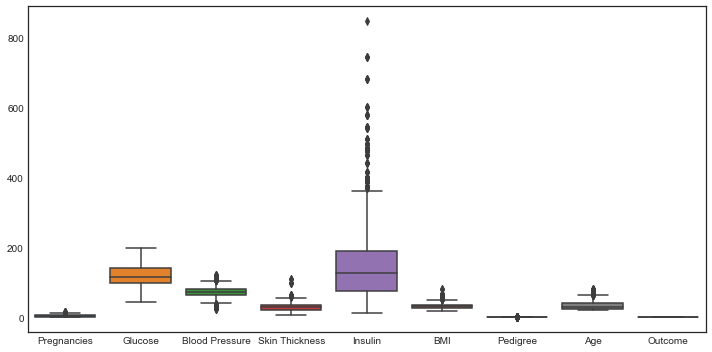

In [4]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
#data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD - Copy.csv")

plt.figure(figsize=(10,5))

sns.boxplot(data=data)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()

plt.savefig("boxplot_before_outlierdetection.png")

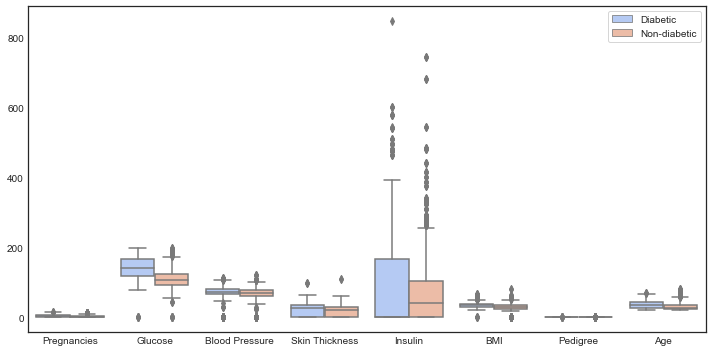

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD - Copy.csv")

plt.style.use("seaborn-white")
sns.set_style("white")

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Feature",y="Value",hue="Outcome2", palette='coolwarm')
plt.legend(title=False, frameon=True, loc=1)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.savefig("boxplot_before_outlierdetection_hue.png")

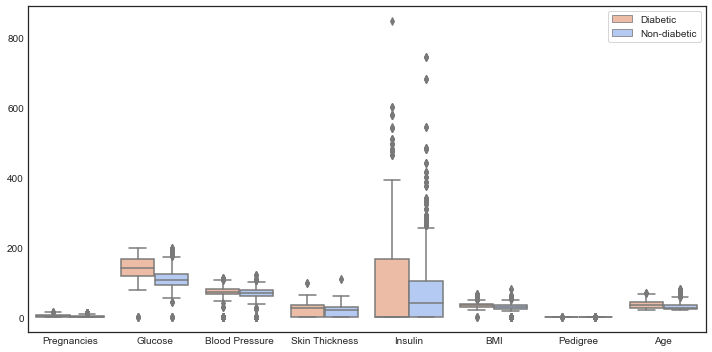

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD.csv")
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\0PIDD_FGDD - Copy.csv")

plt.style.use("seaborn-white")
sns.set_style("white")

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Feature",y="Value",hue="Outcome2", palette='coolwarm_r')
plt.legend(title=False, frameon=True, loc=1)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.savefig("boxplot_before_outlierdetection_hue.png")

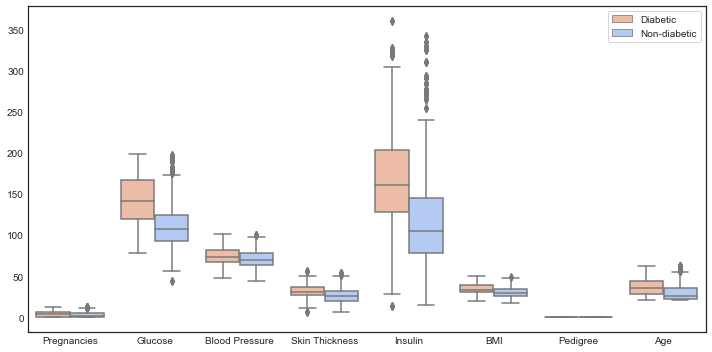

In [84]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\2BAYESIANRIDGEREGRESSION_IQR - Copy.csv")
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Features",y="Values",hue="Outcome", palette='coolwarm_r')
plt.legend(title=False, frameon=True)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.savefig("boxplot_after_outlierdetection_hue.png")

In [24]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")

for i in data.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan
    
data.isna().sum()

C:\Users\aldwi\AppData\Local\Temp\ipykernel_16480\2194346932.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan


PRG    16
GLC     0
BPR    59
SKN    22
INS    90
BMI    38
DPF    97
AGE    68
OUT     0
dtype: int64

In [36]:
brr

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.000000,204.531821,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,68.423700,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.773105,257.040122,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
2763,2.0,75.0,64.0,24.000000,55.000000,29.7,0.370,33.0,0.0
2764,8.0,179.0,72.0,42.000000,130.000000,32.7,0.719,36.0,1.0
2765,6.0,85.0,78.0,27.926778,70.848612,31.2,0.382,42.0,0.0
2766,0.0,129.0,110.0,46.000000,130.000000,67.1,0.319,26.0,1.0


In [41]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

In [44]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

brr = IterativeImputer(estimator=BayesianRidge(),random_state=0)
brr = brr.fit_transform(data)
brr=pd.DataFrame(brr, columns=['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age','Outcome'])

data = brr.reset_index()


data1 = data[data["Outcome"]==0]
data2 = data[data["Outcome"]==1]

for i in data1.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan
    
for i in data2.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan
    
print(data1.isna().sum())
print(data2.isna().sum())

index             0
Pregnancies       0
Glucose           0
Blood Pressure    0
Skin Thickness    0
Insulin           0
BMI               0
Pedigree          0
Age               0
Outcome           0
dtype: int64
index             0
Pregnancies       0
Glucose           0
Blood Pressure    0
Skin Thickness    0
Insulin           0
BMI               0
Pedigree          0
Age               0
Outcome           0
dtype: int64


C:\Users\aldwi\AppData\Local\Temp\ipykernel_16480\1658272324.py:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan
C:\Users\aldwi\AppData\Local\Temp\ipykernel_16480\1658272324.py:36: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan


In [22]:
for i in data.columns:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan

C:\Users\aldwi\AppData\Local\Temp\ipykernel_16480\4221831970.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan


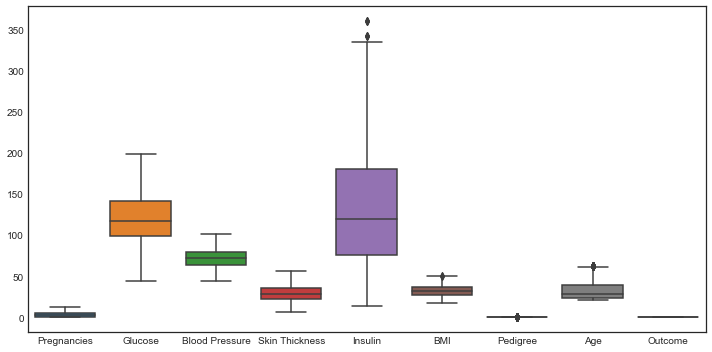

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.tight_layout()
plt.savefig("boxplot_after_outlierdetection.png")

In [17]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     2768 non-null   int64  
 1   GLC     2768 non-null   float64
 2   BPR     2768 non-null   float64
 3   SKN     2768 non-null   float64
 4   INS     2768 non-null   float64
 5   BMI     2768 non-null   float64
 6   DPF     2768 non-null   float64
 7   AGE     2768 non-null   int64  
 8   OUT     2768 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 194.8 KB


In [19]:
import pandas as pd
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\1BRR.csv")

for i in data.columns:
    import numpy as np
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    IQR = q3 - q1
    
    upper = q3 + (1.5*IQR)
    lower = q1 - (1.5*IQR)
    
    data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan

data.isna().sum()

C:\Users\aldwi\AppData\Local\Temp\ipykernel_17776\3539581484.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[~data[i].between((q1-1.5*IQR), (q3+1.5*IQR), inclusive=False),i] = np.nan


PRG    16
GLC     0
BPR    59
SKN    22
INS    90
BMI    38
DPF    97
AGE    68
OUT     0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     2752 non-null   float64
 1   GLC     2768 non-null   float64
 2   BPR     2709 non-null   float64
 3   SKN     2746 non-null   float64
 4   INS     2678 non-null   float64
 5   BMI     2730 non-null   float64
 6   DPF     2671 non-null   float64
 7   AGE     2700 non-null   float64
 8   OUT     2768 non-null   float64
dtypes: float64(9)
memory usage: 194.8 KB


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

brriqr = IterativeImputer(estimator=BayesianRidge(),random_state=0)
brriqr = brr.fit_transform(data)

brr = pd.DataFrame(brr)
brr.to_csv('2BAYESIANRIDGEREGRESSION_IQR.csv')

--------------------------------------------------------------------

In [9]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\data\\2BAYESIANRIDGEREGRESSION_IQR.csv")
data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
0,6.0,148.0,72.00000,35.000000,180.717713,33.6,0.627000,50.0,1
1,1.0,85.0,66.00000,29.000000,78.051178,26.6,0.351000,31.0,0
2,8.0,183.0,64.00000,21.430519,191.004978,23.3,0.672000,32.0,1
3,1.0,89.0,66.00000,23.000000,94.000000,28.1,0.167000,21.0,0
4,0.0,137.0,77.27214,35.000000,168.000000,43.1,0.490641,33.0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     2768 non-null   float64
 1   Glucose         2768 non-null   float64
 2   Blood Pressure  2768 non-null   float64
 3   Skin Thickness  2768 non-null   float64
 4   Insulin         2768 non-null   float64
 5   BMI             2768 non-null   float64
 6   Pedigree        2768 non-null   float64
 7   Age             2768 non-null   float64
 8   Outcome         2768 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 194.8 KB


In [11]:
data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.689332,121.881919,72.024748,28.600676,134.169909,32.296962,0.433107,32.364319,0.343931
std,3.214977,30.557826,10.729865,9.054345,61.278581,6.480493,0.247696,10.452113,0.475104
min,0.000000,44.000000,44.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,90.260608,27.575000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,125.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,173.019892,36.555749,0.583000,39.000000,1.000000
max,13.000000,199.000000,102.000000,56.000000,360.000000,50.700000,1.191000,63.000000,1.000000


# Handling of class imbalance

In [13]:
data.shape

(2768, 9)

In [15]:
from imblearn.combine import SMOTEENN
from collections import Counter

X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

print('Original dataset shape %s' % Counter(y))

smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 1816, 1: 952})
Resampled dataset shape Counter({1: 1782, 0: 1639})


In [16]:
smote_enn = pd.concat([X_resampled, y_resampled],axis=1)
smote_enn.to_csv("4SMOTEENN_IQR_BRR.csv",index=False)

In [17]:
smote_enn.shape

(3421, 9)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

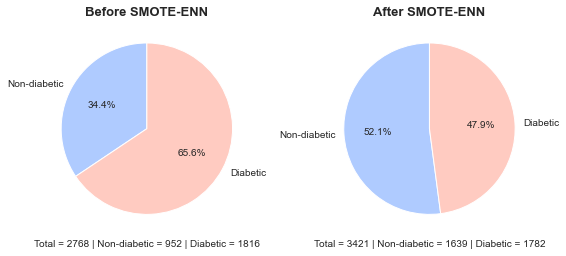

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8,4))

original = [952,1816]
smoteenn = [1782,1639]
classes = ['Non-diabetic','Diabetic']

ax = fig.add_subplot(121)
ax.pie(original, labels=classes, autopct='%.1f%%',startangle=90, colors=['#AFCBFF','#FFCBC1'])
ax.set_title("Before SMOTE-ENN",fontweight="bold",size=13)
ax.set_xlabel("Total = 2768 | Non-diabetic = 952 | Diabetic = 1816")

ax = fig.add_subplot(122)
ax.pie(smoteenn, labels=classes, autopct='%.1f%%',startangle=90,colors=['#AFCBFF','#FFCBC1'])
ax.set_title("After SMOTE-ENN",fontweight="bold",size=13)
ax.set_xlabel("Total = 3421 | Non-diabetic = 1639 | Diabetic = 1782")
plt.tight_layout()

plt.savefig("smote-enn.png")

ValueError: Invalid RGBA argument: 'FFCCCC'

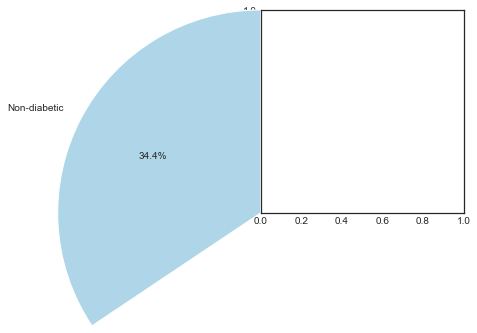

In [72]:
fig = plt.figure(figsize=(8,4))

original = [952,1816]
smoteenn = [1782,1639]
classes = ['Non-diabetic','Diabetic']

colors = sns.color_palette('Reds')

ax = fig.add_subplot(121)
ax.pie(original, labels=classes, autopct='%.1f%%',startangle=90, colors=['#AED6E8','#FFCCCC'])
ax.set_title("Before SMOTE-ENN",fontweight="bold",size=13)
ax.set_xlabel("Total = 2768 | Non-diabetic = 952 | Diabetic = 1816")

ax = fig.add_subplot(122)
ax.pie(smoteenn, labels=classes, autopct='%.1f%%',startangle=90,colors=colors)
ax.set_title("After SMOTE-ENN",fontweight="bold",size=13)
ax.set_xlabel("Total = 3421 | Non-diabetic = 1639 | Diabetic = 1782")
plt.tight_layout()

plt.savefig("smote-enn.png")

# Feature Scaling

In [52]:
data = pd.read_csv("C:\\Users\\aldwi\\OneDrive\\Desktop\\thesis\\notebook\\4SMOTEENN_IQR_BRR.csv")

from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit_transform(data)
ss= pd.DataFrame(ss)
ss.to_csv('5SS_SMOTEENN_IQR_BRR.csv',index=False)

In [54]:
mvi = pd.read_csv("C:/Users/aldwi/OneDrive/Desktop/thesis/notebook/data/MVI_IterativeImputerVariants_Comparison.csv")
mvi

,Model,Metrics,Score
0,BRR,Accuracy,97.713598
1,RFR,Accuracy,96.630566
2,ETR,Accuracy,97.713598
3,KNR,Accuracy,96.991576
4,DTR,Accuracy,96.871239
5,BRR,Precision,95.620438
6,RFR,Precision,95.131086
7,ETR,Precision,95.955882
8,KNR,Precision,94.525547
9,DTR,Precision,94.505495


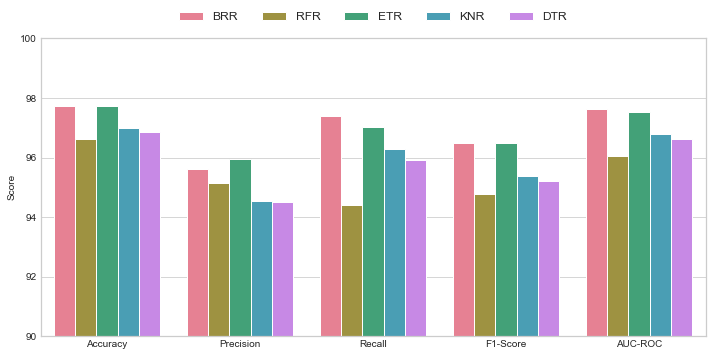

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

sns.barplot(data=mvi,x="Metrics",y="Score",hue="Model",palette="husl")

plt.xlabel(None)
plt.ylim(90,100)
plt.legend(loc=9, fontsize="large", ncol=5, bbox_to_anchor=(0.5,1.125))
#plt. legend(["Bayesian Ridge Regression", "Random Forest Regressor","Extra Tree Regressor", "K-Neighbors Regressor","Decision Tree Regressor"], loc='lower right', fontsize='medium')
plt.tight_layout()
plt.savefig("MVI_Comparison.png")